In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('data/keqing_train.csv')
test_df = pd.read_csv('data/keqing_test.csv')

train_df.head()

,Lv,Base HP,Base ATK,Base DEF
0,1,1020,25,62
1,20,2646,65,161
2,40,5268,130,321
3,50,6776,167,413
4,60,8500,209,519


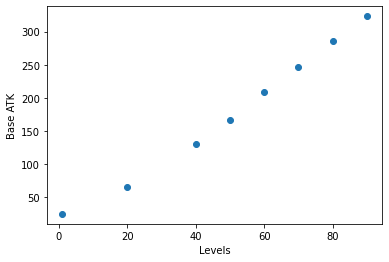

In [3]:
plt.scatter(train_df['Lv'], train_df['Base ATK'])
plt.xlabel('Levels')
plt.ylabel('Base ATK')
plt.show()

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.05))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_df['Lv'], train_df['Base ATK'], epochs=600, verbose=0,validation_split = 0.2)

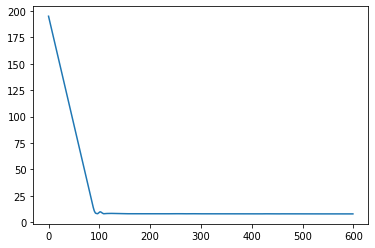

In [7]:
plt.plot(history.history['loss'])
plt.show()

In [8]:
result = {}

result['prediction'] = model.predict(test_df['Lv'])

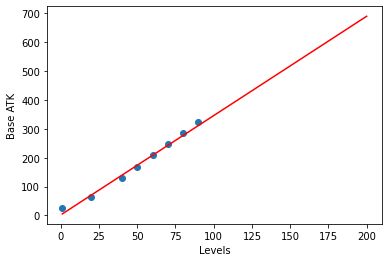

In [9]:
plt.scatter(test_df['Lv'], test_df['Base ATK'])
plt.plot(test_df['Lv'], result['prediction'], color='r')
plt.xlabel('Levels')
plt.ylabel('Base ATK')
plt.show()